# Neuromodulation dopamine and acetylcholine - replay (single neuromodulator)

To simulate single neuromodulator in Snudda, firstly, the parameters from Neuromodcell have to been saved in modulations.json and placed in the model dircetory. 


To install snudda, follow the instructions at https://github.com/Hjorthmedh/Snudda/wiki/1.-User-installation

Following installation, the code below will set up the network and the neuromodulatory modulation.

To set the $DATA parameter for snudda, 

In [ ]:
import os
os.environ["SNUDDA_DATA"] = "data"

This should be set to the directory where neurons, synapses and other parameters for the network have been placed. Look at the 'data' directory for referenece

Set the directory for where the neurons for the striatum (in this example) are saved

In [ ]:
neurons_dir = os.path.abspath(os.path.join("data","neurons"))

We wrote a specific neuromodulation init (based on snuddas init.py), to load the synapses which have had the modulation parameters included into the parameter sets.

In [ ]:
from code.neuromodulationInit import neuromodulationInit

network_path = "dopamine-acetylcholine-trial-network"
config_name= os.path.join(network_path,"network-config.json")
cnc = neuromodulationInit(config_file=config_name,random_seed=12345)

cnc.define_striatum_neuromodulation(num_dSPN=10,num_iSPN=10,num_FS=1,volume_type="cube",neurons_dir=neurons_dir)  
dirName = os.path.dirname(config_name)

if not os.path.exists(dirName):
    os.makedirs(dirName)

cnc.write_json(config_name)

Then we place the neurons within the network (as we are running this locally we are limiting the network to 21 neurons). We then detect the potential synapses (by appositions between axons and dendrites) and then remove (prune) to reproduce the reported connectivity.  

In [ ]:
from snudda.place import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.parse_config()
sp.write_data()

from snudda.detect import SnuddaDetect

sd = SnuddaDetect(network_path=network_path)
sd.detect()

from snudda.prune import SnuddaPrune

sp = SnuddaPrune(network_path=network_path)
sp.prune()

from snudda.plotting.plot_network import PlotNetwork
pn = PlotNetwork(network_path)
pn.plot()
pn.close()

Following the assembly of the circuit, we set up the neuromodulatory transient which will be played through the network. Here, we simulate a dopamine and acetylcholine transients. The acetylcholine transient is tonic with an burst in the shape of an alpha function with time constant 300 ms which starts at 700 ms. The dopamine transient which starts after 500 ms in the shape of an alpha function with time constant 300 ms and maximum modulation 1 (i.e 100%). We then have to add the names of the ion channels which are modulated by dSPN, iSPN and FSN. The control simulation uses a bath application with modulation level at 0 for both acetylcholine and dopamine. 

In [ ]:
# Acetylcholine

from snudda.neuromodulation.modulation_network import Neuromodulation

nl = Neuromodulation()
nl.set_timestep(dt=0.025)

neurotransmitter = "acetylcholine"

nl.set_modulation(neurotransmitter = neurotransmitter, neurotransmitter_key = "ACh")
nl.transient(neurotransmitter=neurotransmitter,
             method= "alpha_background",
             duration= 3000,
             parameters={"tstart" : 700, 
                         "tonic" : 0.5, 
                         "gmax_increase" : 0.5, 
                         "tau" : 300})

neuron_type = "dSPN"
nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "soma",
                          ion_channels = ["kaf_ms","kir_ms","cal12_ms","cal13_ms","can_ms","Im_ms"])
nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "dendrite",
                          ion_channels = ['kaf_ms','kir_ms','cal12_ms','cal13_ms'])


neuron_type = "iSPN"
nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "soma",
                          ion_channels = ["kir_ms","cal12_ms","cal13_ms","can_ms"])

nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "dendrite",
                          ion_channels = ["kir_ms","cal12_ms","cal13_ms"])

nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "axon",
                          ion_channels = ["Im_ms"])

neuron_type = "LTS"


nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = "LTS",
                          section = "soma",
                          ion_channels = ["im_lts","kir23_lts"])

nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "dendrite",
                          ion_channels = ["im_lts","kir23_lts"])


neuron_type = "ChIN"
nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neurotransmitter,
                          section = "soma",
                          ion_channels = ["cap_ch","cal_ch"])

nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "dendrite",
                          ion_channels = ["cap_ch","cal_ch","kir23_ch"])


# Dopamine

neurotransmitter = "dopamine"

nl.set_modulation(neurotransmitter = neurotransmitter, neurotransmitter_key = "DA")
nl.transient(neurotransmitter=neurotransmitter,
             method="alpha",
             duration= 3000,
             parameters={"tstart" : 500, 
                         "gmax" : 1, 
                         "tau" : 300})


neuron_type = "dSPN"
nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "soma",
                          ion_channels = ["cal12_ms","cal13_ms","kir_ms","kas_ms","naf_ms","can_ms"])

nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "dendrite",
                          ion_channels = ["kir_ms","kas_ms","kaf_ms","cal12_ms","cal13_ms"])

neuron_type = "iSPN"
nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "soma",
                          ion_channels = ["kir_ms","kas_ms","kaf_ms","naf_ms","cal12_ms","cal13_ms", "can_ms","car_ms"])

nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "dendrite",
                          ion_channels = ["kir_ms","kas_ms","kaf_ms","naf_ms","cal12_ms","cal13_ms", "can_ms","car_ms"])

nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "axon",
                          ion_channels = ["kir_ms","kas_ms","kaf_ms","naf_ms","cal12_ms","cal13_ms", "can_ms","car_ms"])


neuron_type = "FSN"
nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "soma",
                          ion_channels = ["naf_fs","kaf_fs","kas_fs","kir_fs"])

nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "dendrite",
                          ion_channels = ["naf_fs","kaf_fs","kas_fs","kir_fs"])

neuron_type = "LTS"
nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "soma",
                          ion_channels = ["hd_lts","na3_lts"])

nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "dendrite",
                          ion_channels = ["hd_lts"])

neuron_type = "ChIN"
nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "soma",
                          ion_channels = ["hcn12_ch"])

nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "dendrite",
                          ion_channels = ["hcn12_ch"])

nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "axon",
                          ion_channels = ["hcn12_ch"])


nl.save(dir_path=os.path.join("data", "modulation"),name="acetylcholine_dopamine.json")

In [ ]:
# Acetylcholine

from snudda.neuromodulation.modulation_network import Neuromodulation

nl = Neuromodulation()
nl.set_timestep(dt=0.025)

neurotransmitter = "acetylcholine"
nl.set_modulation(neurotransmitter = neurotransmitter, neurotransmitter_key = "ACh")
nl.transient(neurotransmitter = neurotransmitter,
             method="bath_application",
             duration= 3000,
             parameters={"gmax" : 0})

neuron_type = "dSPN"
nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "soma",
                          ion_channels = ["kaf_ms","kir_ms","cal12_ms","cal13_ms","can_ms","Im_ms"])
nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "dendrite",
                          ion_channels = ['kaf_ms','kir_ms','cal12_ms','cal13_ms'])


neuron_type = "iSPN"
nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "soma",
                          ion_channels = ["kir_ms","cal12_ms","cal13_ms","can_ms"])

nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "dendrite",
                          ion_channels = ["kir_ms","cal12_ms","cal13_ms"])

nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "axon",
                          ion_channels = ["Im_ms"])

neuron_type = "LTS"


nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = "LTS",
                          section = "soma",
                          ion_channels = ["im_lts","kir23_lts"])

nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "dendrite",
                          ion_channels = ["im_lts","kir23_lts"])


neuron_type = "ChIN"
nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neurotransmitter,
                          section = "soma",
                          ion_channels = ["cap_ch","cal_ch"])

nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "dendrite",
                          ion_channels = ["cap_ch","cal_ch","kir23_ch"])

# Dopamine

neurotransmitter = "dopamine"
nl.set_modulation(neurotransmitter = neurotransmitter, neurotransmitter_key = "DA")
nl.transient(neurotransmitter = neurotransmitter,
             method="bath_application",
             duration=3000,
             parameters={"gmax" : 0})


neuron_type = "dSPN"
nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "soma",
                          ion_channels = ["cal12_ms","cal13_ms","kir_ms","kas_ms","naf_ms","can_ms"])

nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "dendrite",
                          ion_channels = ["kir_ms","kas_ms","kaf_ms","cal12_ms","cal13_ms"])

neuron_type = "iSPN"
nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "soma",
                          ion_channels = ["kir_ms","kas_ms","kaf_ms","naf_ms","cal12_ms","cal13_ms", "can_ms","car_ms"])

nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "dendrite",
                          ion_channels = ["kir_ms","kas_ms","kaf_ms","naf_ms","cal12_ms","cal13_ms", "can_ms","car_ms"])

nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "axon",
                          ion_channels = ["kir_ms","kas_ms","kaf_ms","naf_ms","cal12_ms","cal13_ms", "can_ms","car_ms"])


neuron_type = "FSN"
nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "soma",
                          ion_channels = ["naf_fs","kaf_fs","kas_fs","kir_fs"])

nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "dendrite",
                          ion_channels = ["naf_fs","kaf_fs","kas_fs","kir_fs"])

neuron_type = "LTS"
nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "soma",
                          ion_channels = ["hd_lts","na3_lts"])

nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "dendrite",
                          ion_channels = ["hd_lts"])

neuron_type = "ChIN"
nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "soma",
                          ion_channels = ["hcn12_ch"])

nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "dendrite",
                          ion_channels = ["hcn12_ch"])

nl.ion_channel_modulation(neurotransmitter = neurotransmitter,
                          cell_type = neuron_type,
                          section = "axon",
                          ion_channels = ["hcn12_ch"])

nl.save(dir_path=os.path.join("data","modulation"),name="acetylcholine_dopamine_control.json")

Compile the mechanisms used in the simulation

In [ ]:
!nrnivmodl mechanisms-modulation/

Restart the kernel (if the assembly and generation of input and simulation are in different notebooks - THIS STEP IS NOT NEEDED)

In [ ]:
from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
restartkernel()


In [ ]:
import os
from snudda.input import SnuddaInput

os.environ["SNUDDA_DATA"] = "data"

network_path = "dopamine-acetylcholine-trial-network"

si = SnuddaInput(network_path=network_path, 
                 input_config_file=os.path.join("data","external_input","external-input-trial.json"),
                 verbose=False)
si.generate()

In [ ]:
from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
restartkernel()

We then simulate the dopamine and control case using Snudda

In [ ]:
import os
os.environ["SNUDDA_DATA"] = "data"

In [ ]:
!snudda simulate dopamine-acetylcholine-trial-network --time 3.0 --outputFile "dopamine-acetylcholine-trial-network/simulation/network-voltage-DA-ACh-trial.hdf5" --neuromodulation "data/modulation/acetylcholine_dopamine.json"

In [ ]:
!snudda simulate dopamine-acetylcholine-trial-network --time 3.0 --outputFile "dopamine-acetylcholine-trial-network/simulation/network-voltage-DA-ACh-trial-control.hdf5" --neuromodulation "data/modulation/acetylcholine_dopamine_control.json"

Following the simulation, we plot the simulations individually using code from snudda. First, the dopamine modulated simulation

In [ ]:
from snudda.plotting.plot_traces import PlotTraces
import os

plot_offset = 0  
skip_time = 0  
num_traces_max = 10

network_path = "dopamine-acetylcholine-trial-network"
network_file = os.path.join(network_path, "network-synapses.hdf5")
volt_file_name = os.path.join(network_path, "simulation", "network-voltage-DA-ACh-trial.hdf5")

pl = PlotTraces(output_file=volt_file_name,network_file=network_file)

pl.plot_trace_neuron_type(neuron_type="dSPN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)
pl.plot_trace_neuron_type(neuron_type="iSPN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)
pl.plot_trace_neuron_type(neuron_type="FSN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)


Second, we plot the control simulation. 

Loading network info from dopamine-acetylcholine-trial-network/network-synapses.hdf5
Loading 21 neurons with 409 synapses and 0 gap junctions
Loading input info from dopamine-acetylcholine-trial-network/input-spikes.hdf5
Loading dopamine-acetylcholine-trial-network/simulation/network-voltage-DA-ACh-trial-control.hdf5
!!! Excluding first 0 s from the plot
Plotting traces: [0, 1, 2, 3, 4, 5, 10, 12, 14, 17]
Plotted 10 traces (total 21)
Saving to figure Network-voltage-trace--dSPN.pdf


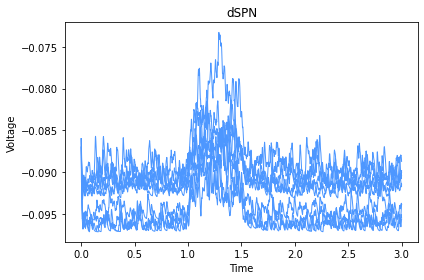

!!! Excluding first 0 s from the plot
Plotting traces: [6, 8, 9, 11, 13, 15, 16, 18, 19, 20]
Plotted 10 traces (total 21)
Saving to figure Network-voltage-trace--iSPN.pdf


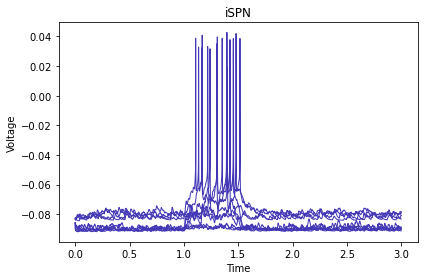

!!! Excluding first 0 s from the plot
Plotting traces: [7]
Plotted 1 traces (total 21)
Saving to figure Network-voltage-trace--FSN.pdf


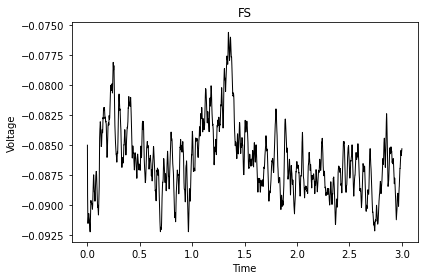

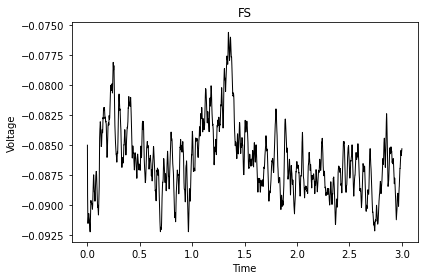

In [1]:
from snudda.plotting.plot_traces import PlotTraces
import os

plot_offset = 0  
skip_time = 0  
num_traces_max = 10

network_path = "dopamine-acetylcholine-trial-network"
network_file = os.path.join(network_path, "network-synapses.hdf5")
volt_file_name = os.path.join(network_path, "simulation", "network-voltage-DA-ACh-trial-control.hdf5")

pl = PlotTraces(output_file=volt_file_name,network_file=network_file)

pl.plot_trace_neuron_type(neuron_type="dSPN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)
pl.plot_trace_neuron_type(neuron_type="iSPN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)
pl.plot_trace_neuron_type(neuron_type="FSN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)

We need load and plot control (black) and dopamine/acetylcholine modulated (red). We see clear effect on dSPN, which should depolarise upon dopamine modulation and the tonic depolarisation following muscarinic modulation, while iSPN do not have a clear effect from dopamine, but muscarinic modulation is tonic and depolarises the cell. FS have quite a large response to dopamine modulation, which is also seen in the network

In [6]:
os.makedirs(os.path.join("dopamine-acetylcholine-trial-network","analysis"), exist_ok=True)

In [7]:
from code.plot import plot_dopamine_acetylcholine_control
from code.compare import compareTraces

network_path = "dopamine-acetylcholine-trial-network"

fn = [os.path.join(network_path, "simulation","network-voltage-DA-ACh-trial-control.hdf5"),
     os.path.join(network_path ,"simulation", "network-voltage-DA-ACh-trial.hdf5")]

nf = [os.path.join(network_path, "network-synapses.hdf5"),
     os.path.join(network_path, "network-synapses.hdf5")]


kl = compareTraces(fileNames=fn,
                   networkFiles=nf,labels=["control", "DA"],colours=["black","red"])



Loading dopamine-acetylcholine-trial-network/simulation/network-voltage-DA-ACh-trial-control.hdf5
Loading dopamine-acetylcholine-trial-network/simulation/network-voltage-DA-ACh-trial.hdf5


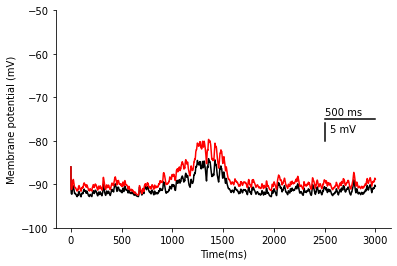

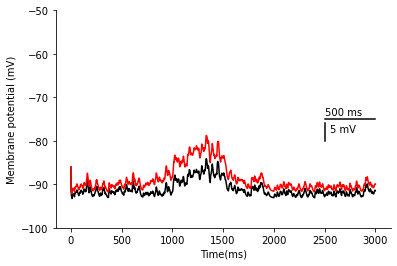

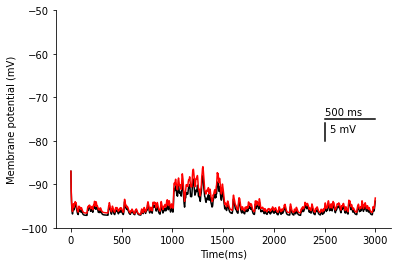

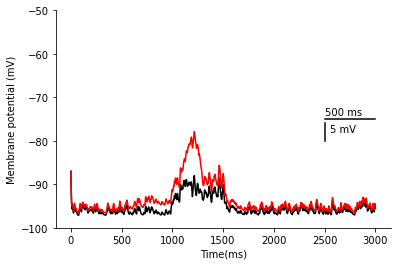

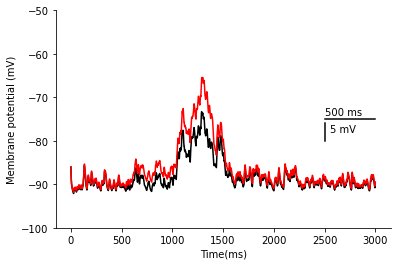

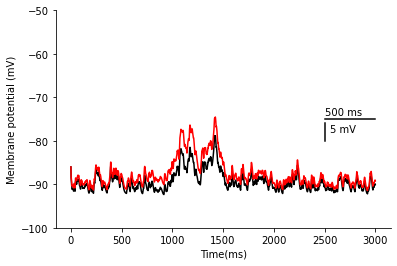

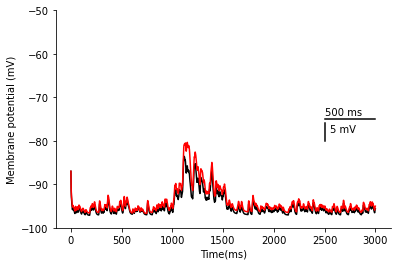

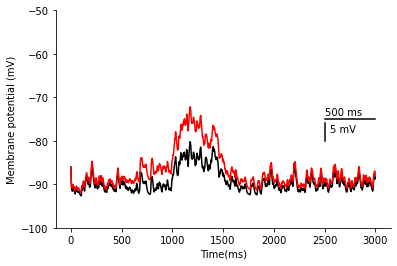

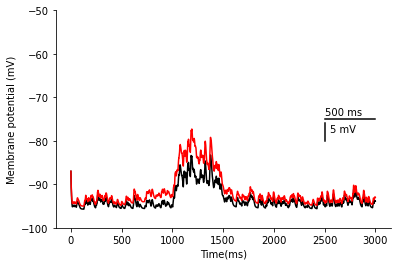

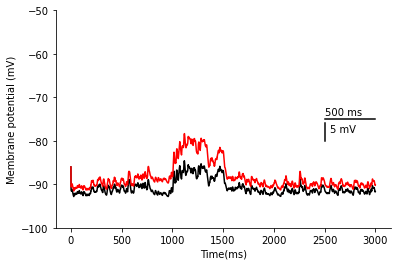

In [8]:
plot_dopamine_acetylcholine_control(kl,type_cell='dSPN')

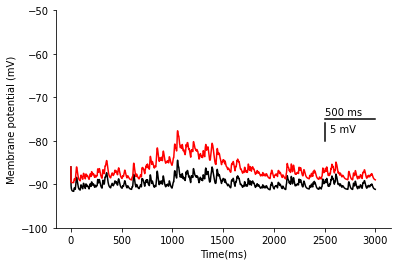

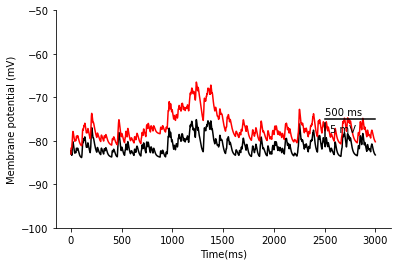

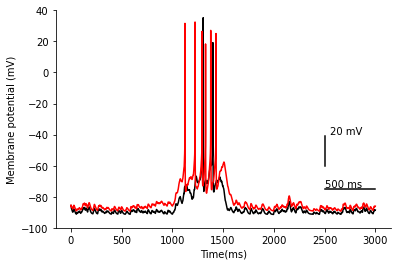

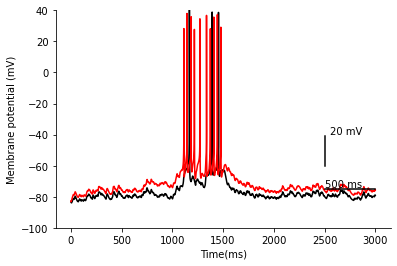

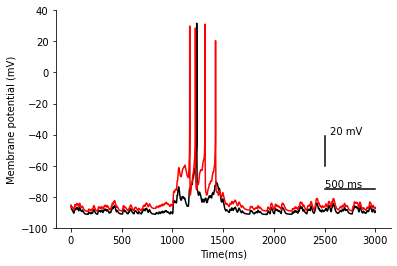

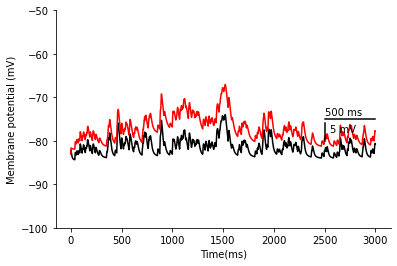

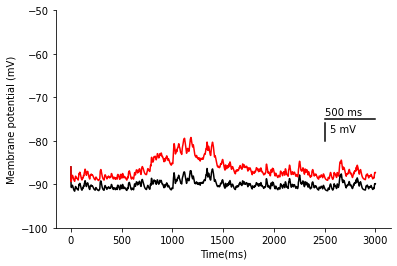

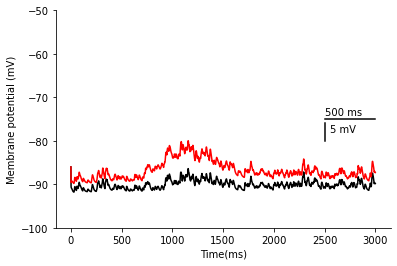

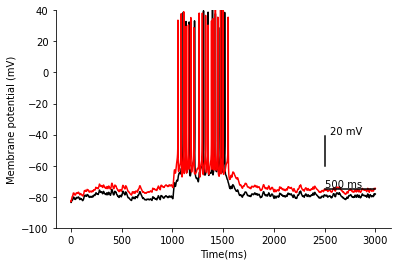

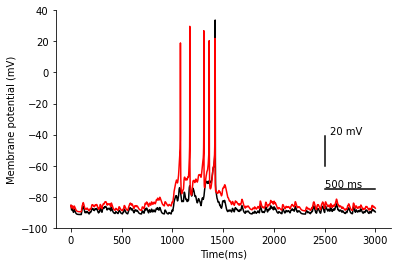

In [9]:
plot_dopamine_acetylcholine_control(kl,type_cell='iSPN')

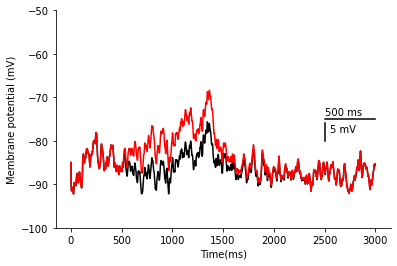

In [10]:
plot_dopamine_acetylcholine_control(kl,type_cell='FSN')